<a href="https://colab.research.google.com/github/bnubald/EQ-live/blob/master/Tutorials/2_Generating_univariate_quadrature_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating univariate quadrature rules
----------------------------------------

There is an intimate relationship between orthogonal polynomials and quadrature points. In this tutorial, we demonstrate how one can use Effective Quadratures to compute univariate quadrature rules. For multivariate quadrature points and weights, please check out the tutorials on *Sparse and tensor grid quadrature rules*.

Consider the task of integrating the function

$$ I = \int_{-1}^{1} f(s)\ \rho(s)\ ds $$

where the measure 𝜌(𝑠) is the uniform distribution over [−1,1]. Our task is to numerically approximate this integral using a quadrature rule, i.e.,

$$ I \approx 2 \sum_{i=1}^{N} f(\lambda_i)\ \omega_i $$

where the pair {$\lambda_i, \omega_i $} $_{i=1}^{N}$ represents an N-point quadrature rule. The constant 2 arises because we are integrating over the range of 2 and our quadrature weights sum up to 1. To obtain such points in Effective Quadratures, one uses the following commands.

In [0]:
#_______________________________________________________________________
# Initial check to see if in Google Colab environment
import sys
IN_COLAB = 'google.colab' in sys.modules

# Install effective-quadratures if in Google Colab environment
# and not already installed
if IN_COLAB and 'equadratures' not in sys.modules:
    !pip install equadratures

In [0]:
from equadratures import Parameter, Basis, Poly, evaluate_model
import numpy as np
import matplotlib.pyplot as plt

order = 4
s1 = Parameter(lower=-1, upper=1, order=order, distribution='Uniform')
myBasis = Basis('Univariate')
myPoly = Poly(s1, myBasis, method='numerical-integration')
points, weights = myPoly.get_points_and_weights()

The above quadrature rule is known as Gauss-Legendre. In practice if one wishes to evaluate an integral, the weights must be scaled depending on the domain of integration. Let $f(x) = x^7 - 3x^6 + x^5 - 10x^4 + 4$ be our function of choice, defined over the domain [−1,1]. The analytical integral for this function is 22/7. Now using our 5-point Gauss-Legendre quadrature rule, we obtain

In [3]:
def function(x):
        return x[0]**7 - 3.0*x[0]**6 + x[0]**5 - 10.0*x[0]**4 +4.0

integral = float( 2.0* np.dot( weights, evaluate_model(points, function) ) )
print(integral)

3.142857142857146


which is equivalent to 22/7. Note that the constant 2 arises because we are integrating over [−1,1] with the uniform measure, which has a density of 1/2.

Now, in addition to standard Gauss-Christoffel quadrature rules (i.e., substitute different distributions in the definition of Parameter), Effective Quadratures also has Gauss-Christoffel-Lobatto rules, which feature end-points and Gauss-Christoffel-Radau rules, which feature either the upper or lower end-points. *i.e.*

In [0]:
# Gauss-Legendre-Radau
s2 = Parameter(lower=-1, upper=1, order=order, distribution='uniform',
               endpoints='lower')
s3 = Parameter(lower=-1, upper=1, order=order, distribution='uniform',
               endpoints='upper')
# Gauss-Legendre-Lobatto
s4 = Parameter(lower=-1, upper=1, order=order, distribution='uniform',
               endpoints='both')

myPoly2 = Poly(s2, myBasis, method='numerical-integration')
myPoly3 = Poly(s3, myBasis, method='numerical-integration')
myPoly4 = Poly(s4, myBasis, method='numerical-integration')

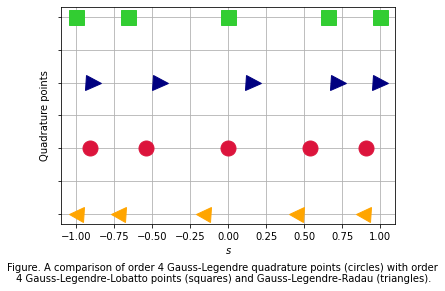

In [5]:
#_______________________________________________________________________
# Plot the different quadrature rules
zeros = np.zeros((order+1))
fig = plt.figure()
plt.xlabel('$s$')
plt.ylabel('Quadrature points')
plt.plot(myPoly.get_points(), zeros, 'o', c='crimson', lw=4, ms=15)
plt.plot(myPoly2.get_points(), zeros-0.1, '<', c='orange', lw=4, ms=15)
plt.plot(myPoly3.get_points(), zeros+0.1, '>', c='navy', lw=4, ms=15)
plt.plot(myPoly4.get_points(), zeros+0.2, 's', c='limegreen', lw=4, ms=15)
plt.grid()
frame = plt.gca()
frame.axes.yaxis.set_ticklabels([])
caption = 'Figure. A comparison of order 4 Gauss-Legendre quadrature points ' \
        '(circles) with order\n 4 Gauss-Legendre-Lobatto points (squares)' \
        ' and Gauss-Legendre-Radau (triangles).'
fig.text(0.5, -0.075, caption, ha='center');

To verify the accuracy of these points, we use the same code as above.

In [6]:
# Gauss-Legendre-Radau
points2, weights2 = myPoly2.get_points_and_weights()
points3, weights3 = myPoly3.get_points_and_weights()
# Gauss-Legendre-Lobatto
points4, weights4 = myPoly4.get_points_and_weights()

integral2 = float( 2.0*np.dot(weights2, evaluate_model(points2, function) ) )
integral3 = float( 2.0*np.dot(weights3, evaluate_model(points3, function) ) )
integral4 = float( 2.0*np.dot(weights4, evaluate_model(points4, function) ) )

print('Gauss-Legendre: ', integral)
print('Gauss-Legendre-Radau (Lower end-point): ', integral2)
print('Gauss-Legendre-Radau (Upper end-point): ', integral3)
print('Gauss-Legendre-Lobatto (Both end-points): ', integral4)

Gauss-Legendre:  3.142857142857146
Gauss-Legendre-Radau (Lower end-point):  3.1428571428571375
Gauss-Legendre-Radau (Upper end-point):  3.142857142857139
Gauss-Legendre-Lobatto (Both end-points):  3.1428571428571535


The full source code for this tutorial can be found [here](https://github.com/Effective-Quadratures/Effective-Quadratures/blob/master/source/_documentation/codes/tutorial_2.py)